In [1]:
import math
import random

In [2]:
class neuron:
    
    def __init__(self,S):
        self.O = 0
        self.err = 0
        self.name = S
        
    def forward(self,x):
        self.O =  0.1 if ((1-math.exp(x))==0) else (1/(1-math.exp(x))) 
        
    def setVal(self,x):
        self.O = x

In [3]:
class edge:
    
    def __init__(self,f,t):
        self.f = f
        self.t = t
        self.w = 0.3

In [4]:
class layer:
    
    def __init__(self,n,S):
        self.n=n
        self.neurons = []
        for i in range(n):
            x = neuron(str(S)+'|'+str(i))
            self.neurons.append(x)

In [31]:
class network:
    
    def __init__(self,config):
        self.layers = []
        name=1
        self.edges_all = []
        for i in config:
            edges = []
            l = layer(i,name)
            name+=1
            if len(self.layers)>0:
                prevl = self.layers[-1]
                for k in prevl.neurons:
                    for j in l.neurons:
                        edges.append(edge(k,j))
                self.edges_all.append(edges)
            self.layers.append(l)
    
    def fit(self,X,Y):
        self.X = X
        self.Y = Y
        
    def forward_pass(self,x):
        i=0
        l = self.layers[0]
        for k in l.neurons:
            edgeList = self.edges_all[0]
            for j in edgeList:
                if j.f.name == k.name:
                    
                    k.O = x[i] 
                    j.f.O = x[i]
                    i+=1
                    break
        i=0
        for l in self.layers[1:]:
            edgelist = self.edges_all[i]
            neuros = l.neurons
            O = 0
            for n in neuros:
                for k in edgelist:
                    if k.t.name==n.name:
#                         print(f'Hello {k.f.O}*{k.w}')
                        O+=(k.f.O * k.w + (0.3))
                n.forward(O)            
            i+=1
    
    def backward_pass(self,y):
        TOT_ERR=0
        t = 0
        rev = self.layers[::-1]
        rev_edge = self.edges_all[::-1]
        target = rev[0]
        for i in target.neurons:
            i.err = i.O*(1-i.O)*(y[t]-i.O)
            t+=1
        t=0
        for l in rev[1:]:
            edgelist = rev_edge[t]
            neuros = l.neurons
            for n in neuros:
                error=0
                for k in edgelist:
                    if k.f.name == n.name:
                        error+=k.t.err*k.w
                n.err = n.O*(1-n.O)*error
                TOT_ERR+=n.err
            t+=1
        return TOT_ERR
    
    def update_weights(self):
        for i in self.edges_all:
            for j in i:
                f = j.f
                t = j.t
                Wt = 0.0001 * t.err * f.O
                j.w+=Wt
    
    def train(self,n):
        for i in range(n):
            error=0
            for j in range(len(self.X)):
                self.forward_pass(X[j])
                err = self.backward_pass(Y[j])
                self.update_weights()
                error+=err
#                 print(error)
            print(f'Epoch - {i+1} || Error : {-1*error}')
    
    def predict(self,x):
        i=0
        l = self.layers[0]
        for k in l.neurons:
            edgeList = self.edges_all[0]
            for j in edgeList:
                if j.f.name == k.name:
                    
                    k.O = x[i] 
                    j.f.O = x[i]
                    i+=1
                    break
        i=0
        for l in self.layers[1:]:
            edgelist = self.edges_all[i]
            neuros = l.neurons
            O = 0
            for n in neuros:
                for k in edgelist:
                    if k.t.name==n.name:
#                         print(f'Hello {k.f.O}*{k.w}')
                        O+=(k.f.O * k.w)
                n.forward(O)            
            i+=1
        a = []
        for i in self.layers[-1].neurons:
            a.append(i.O)
        return a

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('Acoustic_Extinguisher_Fire_Dataset.csv')
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['FUEL'] = encoder.fit_transform(df['FUEL'])
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [9]:
from sklearn.preprocessing import normalize

In [10]:
X = df.iloc[:,:6]
Y = df.iloc[:,6]
X = normalize(X)
X

array([[0.0081808 , 0.        , 0.08180797, 0.78535654, 0.        ,
        0.6135598 ],
       [0.00830426, 0.        , 0.08304262, 0.79720912, 0.        ,
        0.59790684],
       [0.0083848 , 0.        , 0.08384802, 0.80494096, 0.02180048,
        0.58693611],
       ...,
       [0.03392935, 0.0096941 , 0.92093952, 0.38776401, 0.00727058,
        0.01454115],
       [0.03418371, 0.00976678, 0.92784366, 0.37113746, 0.00195336,
        0.00976678],
       [0.03442891, 0.00983683, 0.93449906, 0.35412596, 0.        ,
        0.00491842]])

In [11]:
y = np.array(Y)

In [12]:
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
Y = []
for i in y:
    a = [i]
    Y.append(a)
Y

[[0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1]

In [14]:
X

array([[0.0081808 , 0.        , 0.08180797, 0.78535654, 0.        ,
        0.6135598 ],
       [0.00830426, 0.        , 0.08304262, 0.79720912, 0.        ,
        0.59790684],
       [0.0083848 , 0.        , 0.08384802, 0.80494096, 0.02180048,
        0.58693611],
       ...,
       [0.03392935, 0.0096941 , 0.92093952, 0.38776401, 0.00727058,
        0.01454115],
       [0.03418371, 0.00976678, 0.92784366, 0.37113746, 0.00195336,
        0.00976678],
       [0.03442891, 0.00983683, 0.93449906, 0.35412596, 0.        ,
        0.00491842]])

In [32]:
Net = network([6,4,3,2,1])

In [33]:
Net.fit(X,Y)

In [34]:
Net.train(20)

Epoch - 1 || Error : 19938.265629525406
Epoch - 2 || Error : 60.886620075845805
Epoch - 3 || Error : 46.47853640390335
Epoch - 4 || Error : 35.8305959511961
Epoch - 5 || Error : 27.876073657883374
Epoch - 6 || Error : 21.86736840288909
Epoch - 7 || Error : 17.278299388538503
Epoch - 8 || Error : 13.735936461638994
Epoch - 9 || Error : 10.97366282941234
Epoch - 10 || Error : 8.799017606699548
Epoch - 11 || Error : 7.071654179340925
Epoch - 12 || Error : 5.688171220181388
Epoch - 13 || Error : 4.571606952306526
Epoch - 14 || Error : 3.6641060240173977
Epoch - 15 || Error : 2.921756248561789
Epoch - 16 || Error : 2.3109197101356016
Epoch - 17 || Error : 1.8056012522946912
Epoch - 18 || Error : 1.3855433055200668
Epoch - 19 || Error : 1.0348338015191012
Epoch - 20 || Error : 0.7408797961555189


In [35]:
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [38]:
y_pred=[]
for i in range(len(X_test)):
    r = Net.predict(X_test[i])
    y_pred.append(r)


In [39]:
y_pred

[[-55.50654354974333],
 [-38.63119670822036],
 [-50.60893909856739],
 [-20.86380169689059],
 [-37.51713647658147],
 [-28.945807093048167],
 [-37.40301266939643],
 [-41.862346144096385],
 [-40.90444869054481],
 [-29.63274831933049],
 [-55.13359913812966],
 [-28.619622091112426],
 [-32.15914403584632],
 [-49.45508181633573],
 [-56.163164576883226],
 [-46.37156631979355],
 [-48.5700493068448],
 [-53.30562460888338],
 [-28.48397184914271],
 [-50.00486836736054],
 [-40.715510375455295],
 [-53.531631906763515],
 [-45.56005784977108],
 [-34.37913484205009],
 [-34.44485109467774],
 [-35.159252774974874],
 [-30.564489023807628],
 [-38.719700451126506],
 [-25.097654215145496],
 [-58.25361210941654],
 [-23.35596322198485],
 [-36.36881081879432],
 [-52.80252252575202],
 [-56.953614978600484],
 [-29.587142430288235],
 [-45.97237295323298],
 [-33.13118639239858],
 [-49.66108573708059],
 [-28.349209799282335],
 [-29.501009323246663],
 [-35.410495668909455],
 [-31.82703602961992],
 [-38.34440900414671

In [40]:
for i in y_pred:
    if i[0]<-30:
        i[0]=1
    else:
        i[0]=0

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print(f'Accuracy : {accuracy_score(Y_test,y_pred)*100:.2f}%')

Accuracy : 55.45%


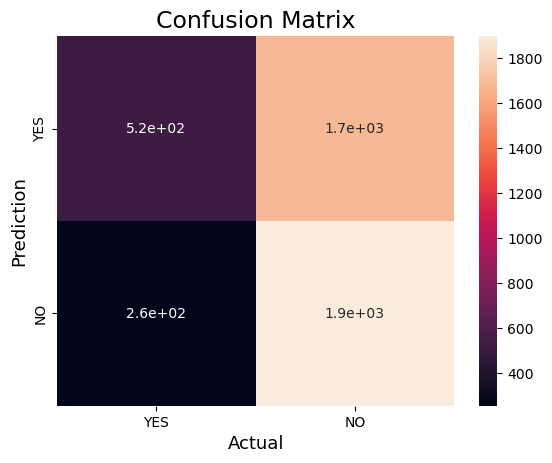

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            xticklabels=['YES','NO'],
            yticklabels=['YES','NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()